# sns Lighning Talk Demo 
Group 21, Plotters for Success

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Today, we will demonstrate the Capabilities of Seaborn using a dataset for NBA shots in the 2024 season. We will be highlighting 3 main functions of seaborn:
1. **Heatmaps**
2. **Built-in** Statistical Functions
3. **Multiplot**


In [2]:
data = pd.read_csv('NBA_2024_Shots.csv')
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


## Pandas Integration

### **Preparing Dataset**

We are then using the built-in statistical functions to establish relationships.

To demonstrate this, we are going to get shots from a few top players and relate it to the distance. To start, we isolated the columns of interest: **Name, Shot Distance, Player Name**

In [3]:
subset = data[['PLAYER_NAME', 'SHOT_DISTANCE', 'SHOT_MADE'] ]
subset = subset.sort_values(by='PLAYER_NAME')
print(subset)

            PLAYER_NAME  SHOT_DISTANCE  SHOT_MADE
171653      A.J. Lawson              3      False
174692      A.J. Lawson              0       True
174759      A.J. Lawson              3       True
172639      A.J. Lawson              0       True
172268      A.J. Lawson              5      False
...                 ...            ...        ...
87107   Zion Williamson              3      False
86032   Zion Williamson              2      False
86034   Zion Williamson              1       True
87104   Zion Williamson              2       True
81366   Zion Williamson              8      False

[218701 rows x 3 columns]


We isolated the top 10 most frequent shooters in the NBA

In [4]:
unique_names = subset['PLAYER_NAME'].value_counts()
top_5 = unique_names.head(5).index.tolist()
print(top_5)


['Luka Doncic', 'Jalen Brunson', 'Anthony Edwards', "De'Aaron Fox", 'Shai Gilgeous-Alexander']


We will now generate a list of pandas dataset for made shots and failed shots

In [5]:
true_list = []
false_list=[]
shot_list= []
for player in top_5:
    player_shots = subset[subset['PLAYER_NAME'] == player]
    shots_by_bool = player_shots.groupby(['SHOT_DISTANCE', 'SHOT_MADE']).size().reset_index(name='Occurrences')
    shots_by_bool['Percentage'] = (shots_by_bool['Occurrences']/shots_by_bool['Occurrences'].sum())*100
    shot_list.append(shots_by_bool)
    true_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==True])
    false_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==False])

# Print Luka Doncic's stats

print('Player Name: ' + top_5[0])
print('Number of Shots Made at each distance')
print(true_list[0].head())

print('\n')
print('Number of Shots Missed at each distance')
print(false_list[0].head())

Player Name: Luka Doncic
Number of Shots Made at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences  Percentage
1              0       True           48    2.905569
3              1       True           78    4.721550
5              2       True           44    2.663438
7              3       True           32    1.937046
9              4       True           25    1.513317


Number of Shots Missed at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences  Percentage
0              0      False           12    0.726392
2              1      False            7    0.423729
4              2      False           15    0.907990
6              3      False           30    1.815981
8              4      False           11    0.665860


From there, we will demonstrate the **integration with Pandas**. 

The first example is the automatic handling of Pandas Dataframes with the use of **x**, **y**, and **hue**.

To demonstrate this, we first will create a relationship plot between the shots Luka Doncic shot in the 2023-2024 season and separating the data based on whether they made or missed it using matplotlib


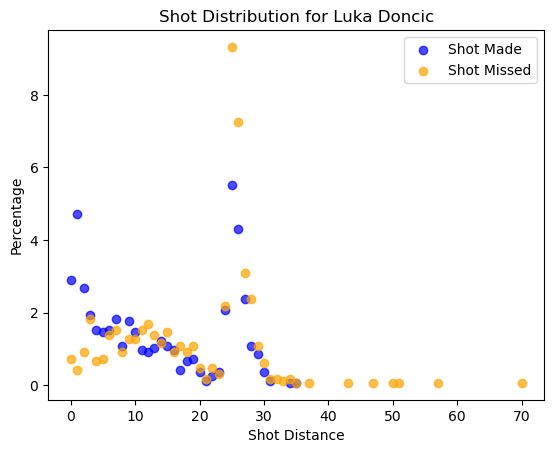

In [12]:
luka_data = shot_list[0]
made_shots = luka_data[luka_data['SHOT_MADE']== True]
missed_shots = luka_data[luka_data['SHOT_MADE']== False]


plt.scatter(made_shots['SHOT_DISTANCE'], made_shots['Percentage'], color = 'blue', label = 'Shot Made', alpha = 0.7)
plt.scatter(missed_shots['SHOT_DISTANCE'], missed_shots['Percentage'], color = 'orange', label = 'Shot Missed', alpha = 0.7)
plt.xlabel('Shot Distance')
plt.ylabel('Percentage')
plt.title('Shot Distribution for Luka Doncic')
plt.legend()
plt.show()


Now using seaborn, we cut down on the number of code by not having ot isolate the pandas dataframes columns explicitly and also being able to segment made and missed shots through hue. Furthermore, the labeling is automatic. However, you are also given the option to change up your axes titles. 

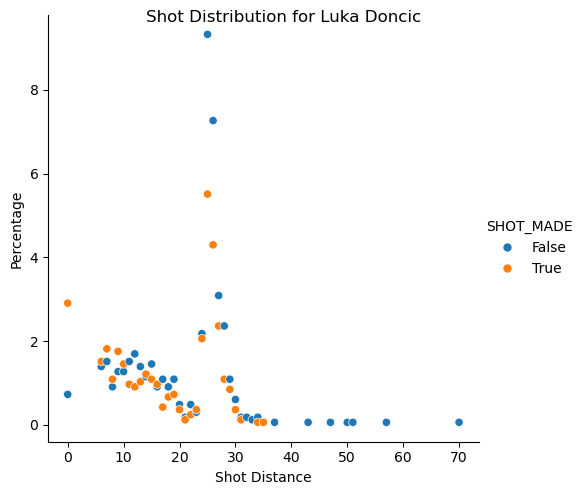

In [38]:
sbplt = sns.relplot(data = shot_list[0], x = "SHOT_DISTANCE", y = "Percentage",  hue = 'SHOT_MADE')
sbplt.set_axis_labels('Shot Distance')
sbplt.figure.suptitle('Shot Distribution for Luka Doncic')
plt.show()

Furthermore, we will look at separating the True and False graphs. This function allows us to separate categorical variables into two distinct plots for ease of use. 

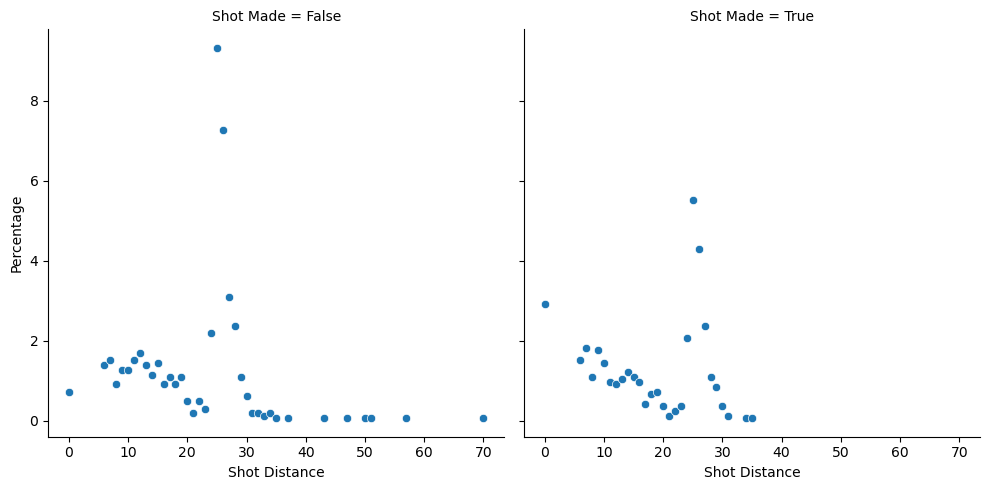

In [42]:
sbplt = sns.relplot(data = shot_list[0], x = "SHOT_DISTANCE", y = "Percentage",  col = 'SHOT_MADE')
sbplt.set_axis_labels('Shot Distance')
sbplt.set_titles('Shot Made = {col_name}')
plt.show()

## Heatmaps

## Multiplot